<a href="https://colab.research.google.com/github/MrSudhish/training-colab/blob/main/5%7C%7C_Gradient_descent_linear_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#GD
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
X=2*np.random.rand(100,1)
y=4+3*X+ np.random.rand(100,1)

In [7]:
m=0
c=0
learning_rate=0.1
n_iterations=20

In [9]:
history=[]

In [11]:
n=len(X)
print(n)
print(f"Starting: m={m}, c={c}")

100
Starting: m=0, c=0


In [14]:
for iteration in range(n_iterations):
  #A. Makw a prediction using current m and c
  y_pred=m*X+c

  #B. Calculate the Error (Residuals)
  error=y_pred - y

  #C. Calculate the Gradients (The "Slope" of the cost Function)
  #How much should we change m?
  m_gradient = (2/n) * np.sum(X * error)

  #How much should we change c?
  C_gradient = (2/n) * np.sum(error)

  #D.
  m=m-(learning_rate * m_gradient)
  c=c-(learning_rate * C_gradient)


  if iteration in [0, 1,5,10,19]:
    history.append((iteration, m,c))
    print(f"Iter {iteration}: m={m:.2f}, c={c:.2f}")

Iter 0: m=2.50, c=2.34
Iter 1: m=3.03, c=2.86
Iter 5: m=3.62, c=3.60
Iter 10: m=3.59, c=3.81
Iter 19: m=3.43, c=4.00


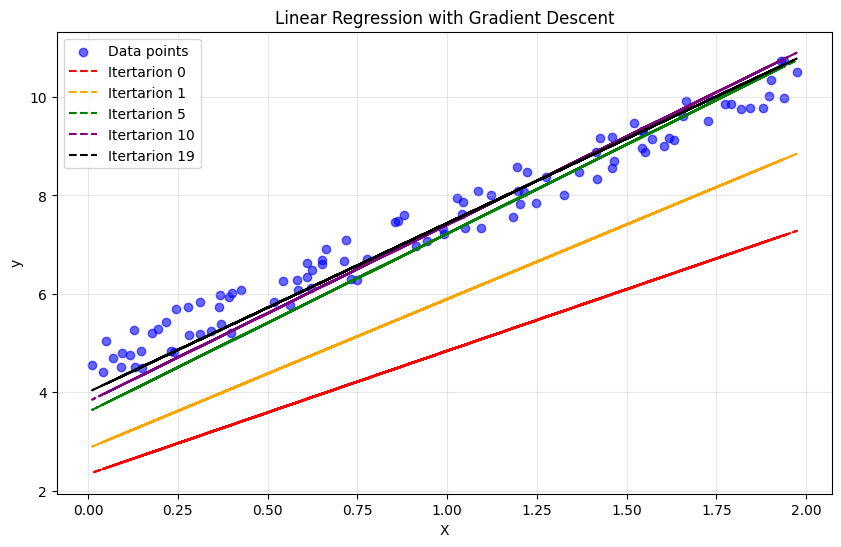

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X,y, color='blue', alpha=0.6, label='Data points')
colors=['red', 'orange','green','purple','black']
for i, (iter_num, m_hist, c_hist) in enumerate(history):
  plt.plot(X, m_hist * X + c_hist, color=colors[i%len(colors)], linestyle='--', label=f'Itertarion {iter_num}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# **sigmoid and softmax**

In [19]:
def sigmoid(z):
  """
  compute the sigmoid of a list of scores.
  Formula: 1/(1+e^-z)
  """
  return 1/(1+np.exp(-z))

def softmax(z):
    """
    compute the softmax of a list of scores.
    Formula: e^z / sum(e^z)
    """
    #1. Exponentiate (make all positive)
    exp_values= np.exp(z)

    #2. Normalize (divide by total sum)
    probabilities=exp_values/np.sum(exp_values)

    return probabilities

In [21]:
#sigmoid
logits_sigmoid = np.array([-2.0, 0.0, 2.0])

for z in logits_sigmoid:
  prob= sigmoid(z)

  #Apply decision Boundary (Treshold 0.5)
  prediction = "PASS" if prob >= 0.5 else "FAIL"

  print(f"Raw Score (z): {z:4.1f} | Prob: {prob:4.1f} | Prediction: {prediction}")

print("\n" + "="*50 + "\n")

Raw Score (z): -2.0 | Prob:  0.1 | Prediction: FAIL
Raw Score (z):  0.0 | Prob:  0.5 | Prediction: PASS
Raw Score (z):  2.0 | Prob:  0.9 | Prediction: PASS




In [23]:
logits_softmax = np.array([2.0, 1.0, 0.1])
print(f"Raw Scores: {logits_softmax}")
print(f"Softmax Scores: {softmax(logits_softmax)}")

Raw Scores: [2.  1.  0.1]
Softmax Scores: [0.65900114 0.24243297 0.09856589]


In [28]:
probs = softmax(logits_softmax)
classes = ["cat",'dog','bird']
winner_index=np.argmax(probs)
winner_name = classes[winner_index]
print(f"Predicted Class: {winner_name} (confidence: {probs[winner_index]*100:.2f}%)")

Predicted Class: cat (confidence: 65.90%)


#  REAL WORLD DATASET

---



In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
data= load_breast_cancer()
X=data.data
y=data.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [37]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
sample_patients= X_test_scaled[:3]

In [41]:
sample_patients

array([[-0.46649743, -0.13728933, -0.44421138, -0.48646498,  0.28085007,
         0.04160589, -0.11146496, -0.26486866,  0.41524141,  0.13513744,
        -0.02091509, -0.29323907, -0.17460869, -0.2072995 , -0.01181432,
        -0.35108921, -0.1810535 , -0.24238831, -0.33731758, -0.0842133 ,
        -0.2632354 , -0.14784208, -0.33154752, -0.35109337,  0.48001942,
        -0.09649594, -0.03583041, -0.19435087,  0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088,  1.34147086, -0.40653902,
        -0.0137241 ,  0.24063659,  0.82144876, -0.83398079, -1.13121527,
         1.36745547, -0.74874907,  1.27009847,  1.18638199, -0.83350144,
        -0.49043919, -0.31559   ,  0.28726031, -0.82243534, -0.76235747,
         1.79461875,  0.17237239,  1.76366112,  1.7441412 , -0.53051417,
        -0.12362004, -0.02818105,  0.99177862, -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139,  0.26659607,  0.96752014,
         0.35641445,  0.72690205,  0.85722095,  0

In [43]:
probabilities= model.predict_proba(sample_patients)

In [44]:
probabilities

array([[1.13590250e-01, 8.86409750e-01],
       [9.99990991e-01, 9.00936206e-06],
       [9.96920905e-01, 3.07909541e-03]])

In [47]:
print(f"categories: {data.target_names}")
for i, prob in enumerate(probabilities):

  sigmoid_output= prob[1]
  prediction="Begin" if sigmoid_output > 0.5 else "Malignant"

  print(f"patient {i+1}: Sigmoid output={sigmoid_output:.4f} ({sigmoid_output*100:.1f}%) -> prediction: {prediction}")

print("\n" + "="*60 + "\n")

categories: ['malignant' 'benign']
patient 1: Sigmoid output=0.8864 (88.6%) -> prediction: Begin
patient 2: Sigmoid output=0.0000 (0.0%) -> prediction: Malignant
patient 3: Sigmoid output=0.0031 (0.3%) -> prediction: Malignant




In [49]:
iris= load_iris()
X = iris.data
y= iris.target

In [51]:
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=42)
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [53]:
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs') #learn about these
model_multi.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [55]:
print(f"categories: {iris.target_names}")
for i, prob in enumerate(probabilities):
  max_conf_index = np.argmax(prob)
  predicted_name= iris.target_names[max_conf_index]

  print(f"Flower {i+1} Softmax Scores: {prob}")
  print(f"    -> Sum of scores: {np.sum(prob):.2f}")
  print(f"    -> Predicted Class: {predicted_name}")
  print("-" * 30)


categories: ['setosa' 'versicolor' 'virginica']
Flower 1 Softmax Scores: [0.11359025 0.88640975]
    -> Sum of scores: 1.00
    -> Predicted Class: versicolor
------------------------------
Flower 2 Softmax Scores: [9.99990991e-01 9.00936206e-06]
    -> Sum of scores: 1.00
    -> Predicted Class: setosa
------------------------------
Flower 3 Softmax Scores: [0.9969209 0.0030791]
    -> Sum of scores: 1.00
    -> Predicted Class: setosa
------------------------------


#                                              COMPLETED LINEAR REGRESSION AND LOGISTIC REGRESSION

---

